<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Загрузить файл hr.csv.

In [10]:
import platform
if platform.system() == 'Linux':
    path = '/content/drive/My Drive/Colab Notebooks/netology_pyda/'
    from google.colab import drive
    drive.mount('/content/drive')
else:
    path = ''
    
    
import pandas as pd

data = pd.read_csv(path +'hr.csv')

In [11]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
len(data.sales.unique())

10

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
for i in data:
    if i not in ['sales', 'salary']:
        data[i].dropna()
        print(f'{i} \nсреднее {data[i].mean()},\nмедиана {data[i].median()},\nмода {data[i].mode()[0]},\nмин {data[i].min()},\nмакс {data[i].max()}, \nсред.отклонение {data[i].std()}\n')

satisfaction_level 
среднее 0.6128335222348166,
медиана 0.64,
мода 0.1,
мин 0.09,
макс 1.0, 
сред.отклонение 0.2486306510611418

last_evaluation 
среднее 0.7161017401159978,
медиана 0.72,
мода 0.55,
мин 0.36,
макс 1.0, 
сред.отклонение 0.17116911062327592

number_project 
среднее 3.80305353690246,
медиана 4.0,
мода 4,
мин 2,
макс 7, 
сред.отклонение 1.2325923553183857

average_montly_hours 
среднее 201.0503366891126,
медиана 200.0,
мода 135,
мин 96,
макс 310, 
сред.отклонение 49.943099371284305

time_spend_company 
среднее 3.498233215547703,
медиана 3.0,
мода 3,
мин 2,
макс 10, 
сред.отклонение 1.4601362305354546

Work_accident 
среднее 0.1446096406427095,
медиана 0.0,
мода 0,
мин 0,
макс 1, 
сред.отклонение 0.3517185523801279

left 
среднее 0.2380825388359224,
медиана 0.0,
мода 0,
мин 0,
макс 1, 
сред.отклонение 0.425924099380363

promotion_last_5years 
среднее 0.021268084538969265,
медиана 0.0,
мода 0,
мин 0,
макс 1, 
сред.отклонение 0.1442814645785774



3.Рассчитать и визуализировать корреляционную матрицу для переменных.

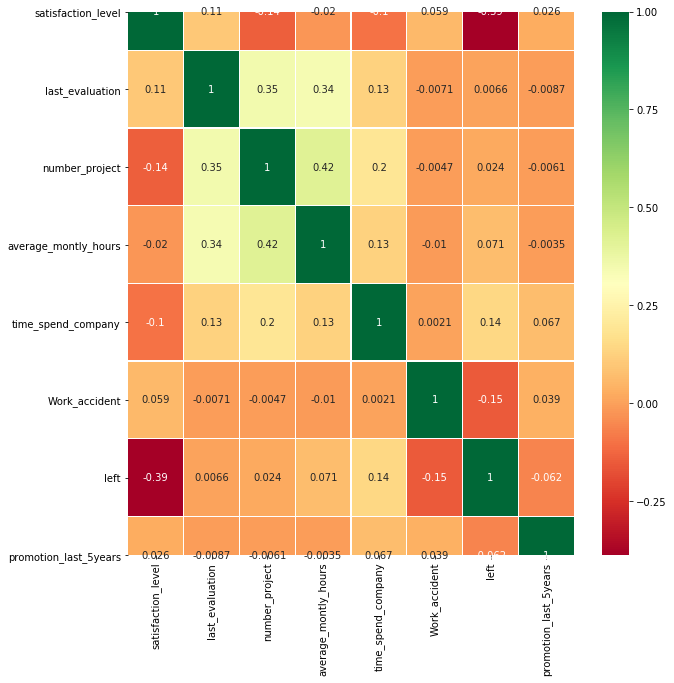

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.gcf().set_size_inches(10,10)

In [17]:
4.Визуализировать несколько взаимосвязей между переменными.

SyntaxError: invalid syntax (<ipython-input-17-1458515c1a2f>, line 1)

In [18]:
import matplotlib.pyplot as plt

def viz1(data, x, y, c):
    columns = [x for x in data]
#     print(columns)
    xl = columns[x]
    yl = columns[y]
    cl = columns[c]
    x = data[xl]
    y = data[yl]
    c = data[cl]
    plt.xlabel(xl)
    plt.ylabel(yl)
    c_set = c.unique()
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(c_set)):
        plt.scatter(x[c == c_set[i]], y[c == c_set[i]], color = colors[i], marker = '.', label = c_set[i])
    plt.gcf().set_size_inches(12,10)
    plt.legend(title = cl)
    return


def dist1(data, y, c):
    columns = [x for x in data]
    print(columns)
#     xl = columns[x]
    yl = columns[y]
    cl = columns[c]
#     x = data[xl]
    y = data[yl]
    c = data[cl]
    plt.xlabel(yl)
    plt.ylabel('quantity of ' + yl)
    c_set = c.unique()
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(c_set)):
        plt.hist(y[c == c_set[i]], 
                 color = colors[i],
                 label = c_set[i],
                 histtype = 'stepfilled', 
                 alpha = 0.3,
                 bins = 100)
    plt.gcf().set_size_inches(12,10)
    plt.legend(title = cl)
    return

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


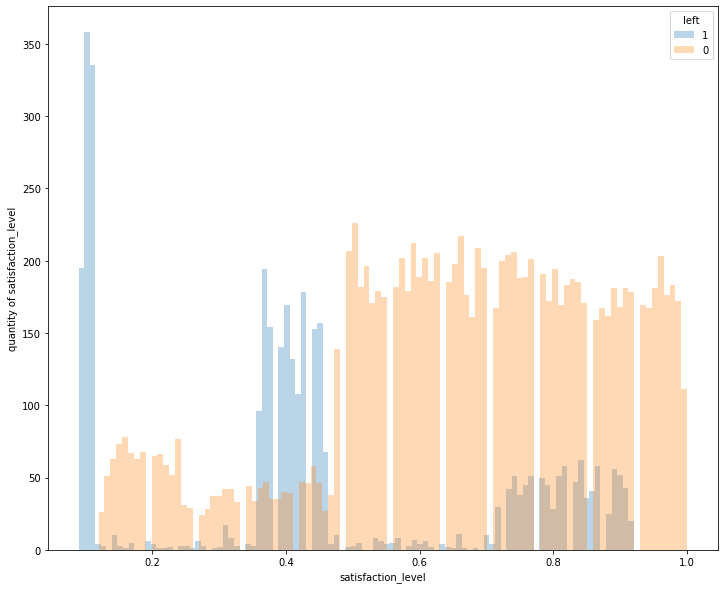

In [19]:
 dist1(data,0,6)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


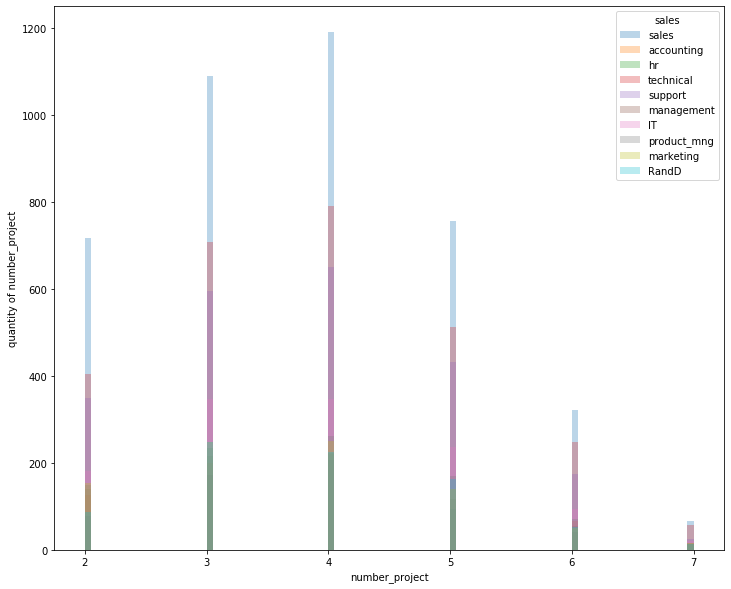

In [20]:
dist1(data,2,8)

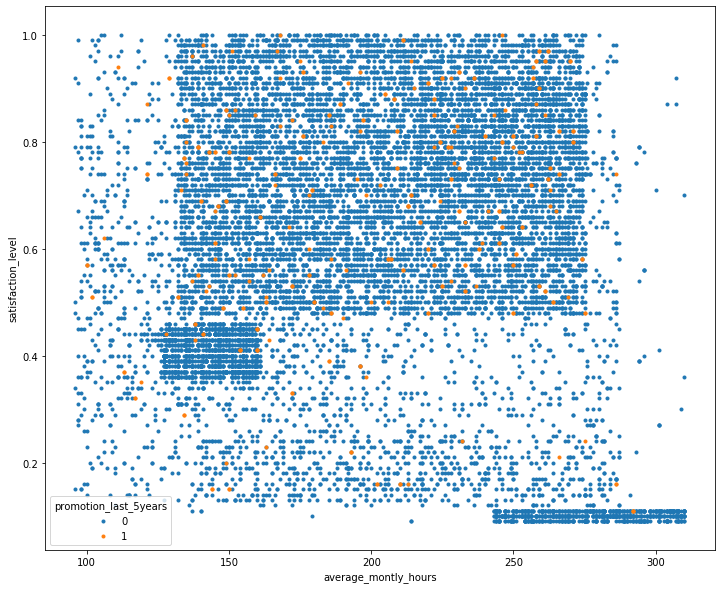

In [21]:
viz1(data, 3, 0, 7)

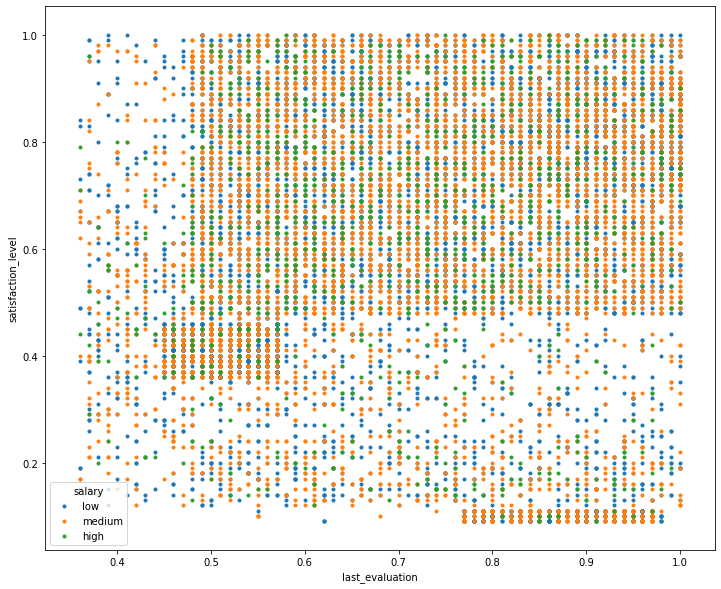

In [22]:
viz1(data, 1, 0, 9)

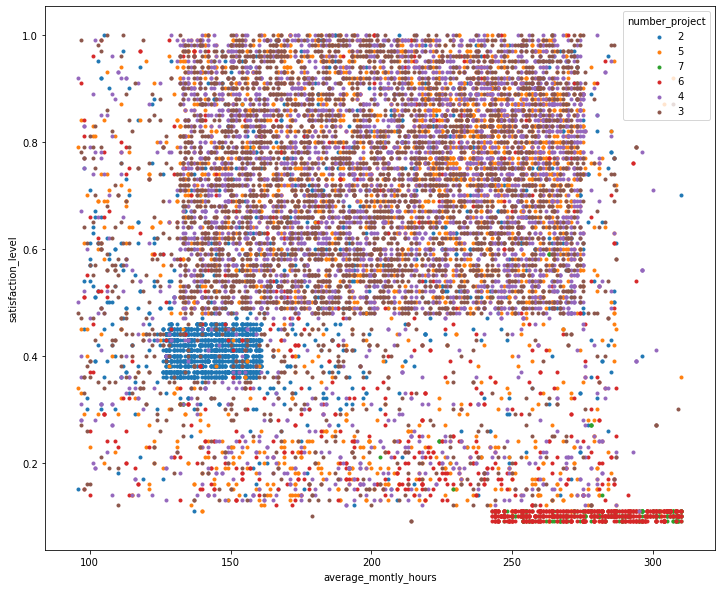

In [23]:
viz1(data,3,0,2)

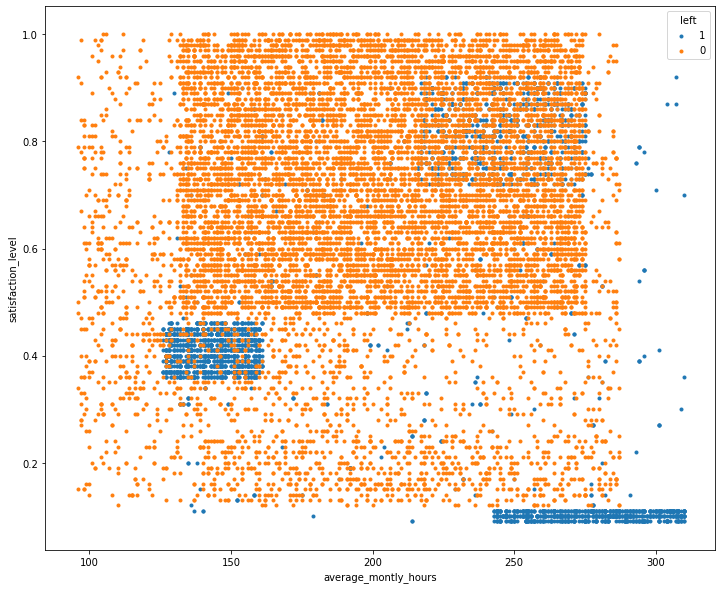

In [24]:
viz1(data,3,0,6)

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [25]:
from scipy import stats

def cat2int(data):
    for z in data: #переводим категориальные переменные в числовые
        if data[z].dtypes not in ['float64', 'int64']:
            uni = data[z].unique()
            data[z] = data[z].apply(lambda x: list(uni).index(x))
    return

In [32]:
cat2int(data)
chk = []

alpha = 0.05

for i in data:
    d1 = data[i]
    for u in data:
        d2 = data[u]
        d2l = d2.unique()
        if i + u not in chk and i!=u and len(list(d2l))<5:
            for z in d2l:
                p_val = round(stats.ttest_1samp(d1[d2==z], d1.mean())[1],3)
                if p_val > alpha:
                    print(f'p значение t-теста {p_val} {i} при {u} = {z}')
            chk.append(i + u)
            chk.append(u + i)

p значение t-теста 0.648 satisfaction_level при promotion_last_5years = 0
p значение t-теста 0.742 last_evaluation при Work_accident = 0
p значение t-теста 0.409 last_evaluation при Work_accident = 1
p значение t-теста 0.543 last_evaluation при left = 1
p значение t-теста 0.678 last_evaluation при left = 0
p значение t-теста 0.877 last_evaluation при promotion_last_5years = 0
p значение t-теста 0.289 last_evaluation при promotion_last_5years = 1
p значение t-теста 0.651 last_evaluation при salary = 0
p значение t-теста 0.567 last_evaluation при salary = 1
p значение t-теста 0.829 number_project при Work_accident = 0
p значение t-теста 0.537 number_project при Work_accident = 1
p значение t-теста 0.085 number_project при left = 1
p значение t-теста 0.074 number_project при left = 0
p значение t-теста 0.914 number_project при promotion_last_5years = 0
p значение t-теста 0.391 number_project при promotion_last_5years = 1
p значение t-теста 0.833 number_project при salary = 0
p значение t-

In [ ]:
6.Рассчитать сколько работников работает в каждом департаменте.

In [ ]:
data.groupby(data.sales).count()['salary']

In [ ]:
7.Показать распределение сотрудников по зарплатам.

In [ ]:
dist1(data, 9, 6)

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [ ]:
dist1(data, 9, 8)

In [ ]:
9.Сколько сотрудников покинули компанию.

In [ ]:
data.left[data.left == 1].count()

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [ ]:
from statsmodels.stats.diagnostic import lilliefors
import numpy as np

cat2int(data)
al = 0.001
dist = stats.gamma

test_results = pd.DataFrame(columns = ['name','norm', 'lognorm','exp','gamma'])
for i in data:
    args = dist.fit(data[i])
    data[i] = data[i].dropna()  
    data[i] = data[i] - data[i].mean()
    data[i] = data[i] / data[i].min()
    test_results = test_results.append(
        {'name':i,
         'norm':stats.normaltest(data[i])[1] > al,
         'lognorm':stats.normaltest(np.log(data[i]))[1] > al,
         'exp':lilliefors(data[i], dist='exp')[1] > al,
         'gamma':stats.kstest(data[i], dist.cdf, args)[1] > al},
          ignore_index=True)
    
    data[i].hist(bins=20)
print(test_results)

In [ ]:
cat2int(data)

alpha = 0.05
for i in data:
#     print(stats.ttest_ind(data[data.left==1][i], data[data.left==1][i])[1], i)
    
    t = stats.ttest_1samp(data[data.left==1][i], data[i].mean())[1]
    if t > alpha:
        print(f'Уход сотрудников из компании вероятнее всего (pvalue {round(t, 3)}) связан с {i} при альфа уровне {alpha}\n')
#     print(stats.ttest_1samp(data[data.left==0][i], data[i].mean())[1], i,'left 0\n')


При альфа уровне 0.05 основые гипотезы, что увольнения сотрудников связаны с повышениями (pvalue 0.678) 
и проектами (pvalue 0.074) в которых они были задействованы. Гипотеза с проектами была очевидна из визуализаций, где явно выделялись области уволенных, совпадающие с областями проектов, что и было подтвержденно при А\В тестировании.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете